In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('training.csv')
testdata = pd.read_csv("test.csv")
sample_sub = pd.read_csv('sample_submission.csv')

In [5]:
sample_sub.nunique()

TransactionId    45019
FraudResult          0
dtype: int64

In [20]:
data.sample(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
54647,TransactionId_22372,BatchId_138868,AccountId_4249,SubscriptionId_4429,CustomerId_7343,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,-30000.0,30000,2019-01-08T12:11:32Z,4,0
43974,TransactionId_1487,BatchId_8623,AccountId_2139,SubscriptionId_4770,CustomerId_2544,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2600.0,2600,2018-12-28T11:13:48Z,2,0
65162,TransactionId_69187,BatchId_80610,AccountId_2636,SubscriptionId_4311,CustomerId_3054,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-01-18T21:03:17Z,2,0
71442,TransactionId_10994,BatchId_21478,AccountId_318,SubscriptionId_3087,CustomerId_647,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-01-25T09:00:21Z,2,0
8960,TransactionId_37787,BatchId_60838,AccountId_3809,SubscriptionId_4505,CustomerId_4252,UGX,256,ProviderId_3,ProductId_27,tv,ChannelId_3,12000.0,12360,2018-11-26T17:41:41Z,1,0
62069,TransactionId_92063,BatchId_116728,AccountId_1616,SubscriptionId_4410,CustomerId_1995,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,997.0,997,2019-01-16T17:38:08Z,2,0
1771,TransactionId_128837,BatchId_104100,AccountId_10,SubscriptionId_4346,CustomerId_4552,UGX,256,ProviderId_4,ProductId_1,airtime,ChannelId_5,-500.0,500,2018-11-16T16:09:18Z,4,0
84728,TransactionId_53535,BatchId_29338,AccountId_352,SubscriptionId_1465,CustomerId_682,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-04T05:29:36Z,2,0
83574,TransactionId_89095,BatchId_67783,AccountId_10,SubscriptionId_4346,CustomerId_2282,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_5,-1700.0,1700,2019-02-02T18:49:30Z,4,0
40506,TransactionId_120587,BatchId_27801,AccountId_575,SubscriptionId_4369,CustomerId_912,UGX,256,ProviderId_1,ProductId_1,airtime,ChannelId_3,2000.0,2000,2018-12-25T19:42:12Z,4,0


In [21]:
data.shape

(95662, 16)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


In [23]:
cols_to_drop = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId','CurrencyCode','CountryCode','ProductId','Value']
data.drop(cols_to_drop,axis=1,inplace=True)

In [24]:
data.head()

,ProviderId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult
0,ProviderId_6,airtime,ChannelId_3,1000.0,2018-11-15T02:18:49Z,2,0
1,ProviderId_4,financial_services,ChannelId_2,-20.0,2018-11-15T02:19:08Z,2,0
2,ProviderId_6,airtime,ChannelId_3,500.0,2018-11-15T02:44:21Z,2,0
3,ProviderId_1,utility_bill,ChannelId_3,20000.0,2018-11-15T03:32:55Z,2,0
4,ProviderId_4,financial_services,ChannelId_2,-644.0,2018-11-15T03:34:21Z,2,0


In [25]:
testdata.sample()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
37647,TransactionId_24890,BatchId_19906,AccountId_4841,SubscriptionId_3829,CustomerId_750,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-08T12:38:08Z,2


In [26]:
testdata.drop(cols_to_drop,axis=1,inplace=True)

In [27]:
testdata.head()

,ProviderId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy
0,ProviderId_5,airtime,ChannelId_3,1000.0,2019-02-13T10:01:40Z,4
1,ProviderId_5,financial_services,ChannelId_3,2000.0,2019-02-13T10:02:12Z,2
2,ProviderId_4,financial_services,ChannelId_2,-50.0,2019-02-13T10:02:30Z,2
3,ProviderId_5,airtime,ChannelId_3,3000.0,2019-02-13T10:02:38Z,4
4,ProviderId_4,financial_services,ChannelId_2,-60.0,2019-02-13T10:02:58Z,2


In [28]:
data.shape

(95662, 7)

In [29]:
testdata.shape

(45019, 6)

In [30]:
data.describe()

,Amount,PricingStrategy,FraudResult
count,9.566200e+04,95662.000000,95662.000000
mean,6.717846e+03,2.255974,0.002018
std,1.233068e+05,0.732924,0.044872
min,-1.000000e+06,0.000000,0.000000
25%,-5.000000e+01,2.000000,0.000000
50%,1.000000e+03,2.000000,0.000000
75%,2.800000e+03,2.000000,0.000000
max,9.880000e+06,4.000000,1.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 7 columns):
ProviderId              95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 5.1+ MB


In [32]:
data.head()

,ProviderId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult
0,ProviderId_6,airtime,ChannelId_3,1000.0,2018-11-15T02:18:49Z,2,0
1,ProviderId_4,financial_services,ChannelId_2,-20.0,2018-11-15T02:19:08Z,2,0
2,ProviderId_6,airtime,ChannelId_3,500.0,2018-11-15T02:44:21Z,2,0
3,ProviderId_1,utility_bill,ChannelId_3,20000.0,2018-11-15T03:32:55Z,2,0
4,ProviderId_4,financial_services,ChannelId_2,-644.0,2018-11-15T03:34:21Z,2,0


In [33]:
cat_cols = data.select_dtypes(exclude=['int64','float64']).columns

In [34]:
cat_cols = list(cat_cols)
cat_cols

['ProviderId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']

In [35]:
for col in cat_cols:
    print("Value count for {}".format(col))
    print(data[col].nunique())
    print("_"*38)

Value count for ProviderId
6
______________________________________
Value count for ProductCategory
9
______________________________________
Value count for ChannelId
4
______________________________________
Value count for TransactionStartTime
94556
______________________________________


In [36]:
#Convert time series column 

data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
testdata['TransactionStartTime'] = pd.to_datetime(testdata['TransactionStartTime'])

In [37]:
#data['Day']  = data['TransactionStartTime'].dt.day
data['wk_day']  = data['TransactionStartTime'].dt.weekday_name
data['Minute']  = data['TransactionStartTime'].dt.minute
data['Hour']  = data['TransactionStartTime'].dt.hour
data['Month']  = data['TransactionStartTime'].dt.month
data['Year']  = data['TransactionStartTime'].dt.year

testdata['wk_day']  = testdata['TransactionStartTime'].dt.weekday_name
testdata['Minute']  = testdata['TransactionStartTime'].dt.minute
testdata['Hour']  = testdata['TransactionStartTime'].dt.hour
testdata['Month']  = testdata['TransactionStartTime'].dt.month
testdata['Year']  = testdata['TransactionStartTime'].dt.year

data.head()

,ProviderId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,wk_day,Minute,Hour,Month,Year
0,ProviderId_6,airtime,ChannelId_3,1000.0,2018-11-15 02:18:49+00:00,2,0,Thursday,18,2,11,2018
1,ProviderId_4,financial_services,ChannelId_2,-20.0,2018-11-15 02:19:08+00:00,2,0,Thursday,19,2,11,2018
2,ProviderId_6,airtime,ChannelId_3,500.0,2018-11-15 02:44:21+00:00,2,0,Thursday,44,2,11,2018
3,ProviderId_1,utility_bill,ChannelId_3,20000.0,2018-11-15 03:32:55+00:00,2,0,Thursday,32,3,11,2018
4,ProviderId_4,financial_services,ChannelId_2,-644.0,2018-11-15 03:34:21+00:00,2,0,Thursday,34,3,11,2018


In [38]:
data.drop(columns='TransactionStartTime',axis=1,inplace=True)
testdata.drop(columns='TransactionStartTime',axis=1,inplace=True)

In [39]:
data.head()

,ProviderId,ProductCategory,ChannelId,Amount,PricingStrategy,FraudResult,wk_day,Minute,Hour,Month,Year
0,ProviderId_6,airtime,ChannelId_3,1000.0,2,0,Thursday,18,2,11,2018
1,ProviderId_4,financial_services,ChannelId_2,-20.0,2,0,Thursday,19,2,11,2018
2,ProviderId_6,airtime,ChannelId_3,500.0,2,0,Thursday,44,2,11,2018
3,ProviderId_1,utility_bill,ChannelId_3,20000.0,2,0,Thursday,32,3,11,2018
4,ProviderId_4,financial_services,ChannelId_2,-644.0,2,0,Thursday,34,3,11,2018


In [40]:
testdata.head()

,ProviderId,ProductCategory,ChannelId,Amount,PricingStrategy,wk_day,Minute,Hour,Month,Year
0,ProviderId_5,airtime,ChannelId_3,1000.0,4,Wednesday,1,10,2,2019
1,ProviderId_5,financial_services,ChannelId_3,2000.0,2,Wednesday,2,10,2,2019
2,ProviderId_4,financial_services,ChannelId_2,-50.0,2,Wednesday,2,10,2,2019
3,ProviderId_5,airtime,ChannelId_3,3000.0,4,Wednesday,2,10,2,2019
4,ProviderId_4,financial_services,ChannelId_2,-60.0,2,Wednesday,2,10,2,2019


In [41]:
data.dtypes

ProviderId          object
ProductCategory     object
ChannelId           object
Amount             float64
PricingStrategy      int64
FraudResult          int64
wk_day              object
Minute               int64
Hour                 int64
Month                int64
Year                 int64
dtype: object

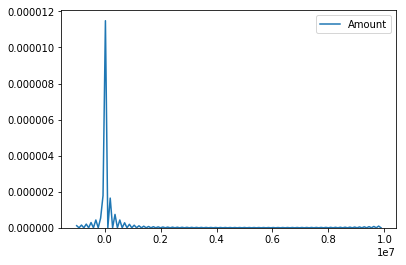

In [43]:
sns.kdeplot(data['Amount'])

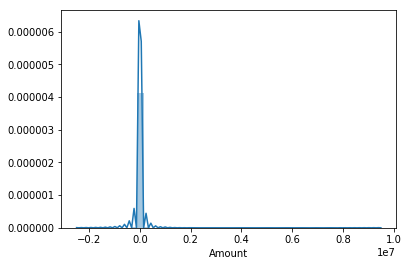

In [44]:
sns.distplot(testdata['Amount'])

In [45]:
#Log1p helps us transform our data from been Left_skewed to a Normal data

data["Amount"] = np.log1p(data["Amount"])
testdata["Amount"] = np.log1p(testdata["Amount"])

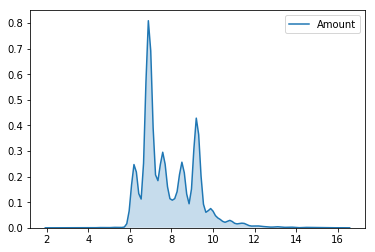

In [46]:
sns.kdeplot(data['Amount'],shade=True)

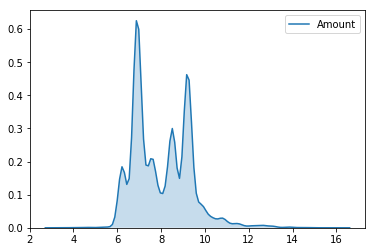

In [47]:
sns.kdeplot(testdata['Amount'],shade=True)

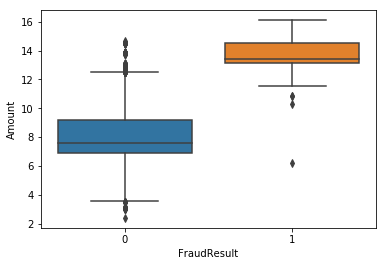

In [48]:
sns.boxplot(x='FraudResult', y='Amount', data=data)

In [49]:
data.isnull().sum()

ProviderId             0
ProductCategory        0
ChannelId              0
Amount             38189
PricingStrategy        0
FraudResult            0
wk_day                 0
Minute                 0
Hour                   0
Month                  0
Year                   0
dtype: int64

In [50]:
data['Amount'].mean()

7.885124192389278

In [51]:
#How to treat misssing values in a dataset
data["Amount"].fillna((data["Amount"].mean()), inplace=True)

In [52]:
data.isnull().sum()

ProviderId         0
ProductCategory    0
ChannelId          0
Amount             0
PricingStrategy    0
FraudResult        0
wk_day             0
Minute             0
Hour               0
Month              0
Year               0
dtype: int64

In [53]:
testdata.isnull().sum()

ProviderId             0
ProductCategory        0
ChannelId              0
Amount             18254
PricingStrategy        0
wk_day                 0
Minute                 0
Hour                   0
Month                  0
Year                   0
dtype: int64

In [54]:
testdata['Amount'].mean()

8.029112173884352

In [55]:
testdata['Amount'].fillna((testdata['Amount'].mean()),inplace=True)

In [56]:
testdata.isnull().sum()

ProviderId         0
ProductCategory    0
ChannelId          0
Amount             0
PricingStrategy    0
wk_day             0
Minute             0
Hour               0
Month              0
Year               0
dtype: int64

In [57]:
all_data = pd.concat([data, testdata])

In [58]:
all_data.head()

,Amount,ChannelId,FraudResult,Hour,Minute,Month,PricingStrategy,ProductCategory,ProviderId,Year,wk_day
0,6.908755,ChannelId_3,0.0,2,18,11,2,airtime,ProviderId_6,2018,Thursday
1,7.885124,ChannelId_2,0.0,2,19,11,2,financial_services,ProviderId_4,2018,Thursday
2,6.216606,ChannelId_3,0.0,2,44,11,2,airtime,ProviderId_6,2018,Thursday
3,9.903538,ChannelId_3,0.0,3,32,11,2,utility_bill,ProviderId_1,2018,Thursday
4,7.885124,ChannelId_2,0.0,3,34,11,2,financial_services,ProviderId_4,2018,Thursday


In [59]:
#Next thing is we transform nominal values to numerical values through an encoding scheme called LabelEnccoder



In [60]:
cat_cols = all_data.select_dtypes(exclude=['int64','float64']).columns

In [61]:
cat_cols = list(cat_cols)
cat_cols

['ChannelId', 'ProductCategory', 'ProviderId', 'wk_day']

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
lb = LabelEncoder()

for col in cat_cols:
    lb.fit(all_data[col])
    all_data[col] = lb.transform(all_data[col])

In [64]:
all_data.sample(5)

,Amount,ChannelId,FraudResult,Hour,Minute,Month,PricingStrategy,ProductCategory,ProviderId,Year,wk_day
74385,6.803505,2,0.0,18,47,1,2,8,4,2019,2
43495,7.885124,1,0.0,7,41,12,2,2,3,2018,0
8429,6.908755,2,0.0,19,15,11,2,0,5,2018,3
75806,6.908755,2,0.0,7,50,1,2,0,5,2019,1
14098,9.210440,2,NaN,6,40,2,2,0,5,2019,0


In [65]:
all_data.shape

(140681, 11)

In [72]:
#Slice the data concatenated to split them as ur test and train set
train = all_data[0:95662]
test = all_data[95662:]

In [73]:
test.drop(columns='FraudResult', inplace=True)

In [74]:
X = train.loc[:, train.columns != 'FraudResult']
y = train.loc[:, train.columns == 'FraudResult']

In [75]:
X.head()

,Amount,ChannelId,Hour,Minute,Month,PricingStrategy,ProductCategory,ProviderId,Year,wk_day
0,6.908755,2,2,18,11,2,0,5,2018,4
1,7.885124,1,2,19,11,2,2,3,2018,4
2,6.216606,2,2,44,11,2,0,5,2018,4
3,9.903538,2,3,32,11,2,9,0,2018,4
4,7.885124,1,3,34,11,2,2,3,2018,4


In [76]:
X.shape

(95662, 10)

In [77]:
y.shape

(95662, 1)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(test)

In [80]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.22, random_state = 1)

In [86]:
from sklearn.metrics import f1_score

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [88]:
Dc_model = DecisionTreeClassifier(random_state=1)
Dc_model.fit(X_train,y_train)
Dc_pred = Dc_model.predict(X_test)

In [89]:
f1_score(Dc_pred, y_test)

0.8139534883720929

In [90]:
Rf = RandomForestClassifier(n_estimators=600,random_state=1,max_depth=6)
Rf.fit(X_train,y_train)
Rf_pred = Rf.predict(X_test)

In [91]:
f1_score(Rf_pred, y_test)

0.8333333333333334

In [168]:
xgb= XGBClassifier(random_state=1,n_estimators=600,max_depth=6,learning_rate=0.3,gamma=0.2)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
f1_score(xgb_pred, y_test)

0.8863636363636365

In [84]:
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier()
LGBM.fit(X_train,y_train)
predict = LGBM.predict(X_test)

f1_score(predict, y_test)

0.39175257731958757

In [92]:
from catboost import CatBoostClassifier

Catboost = CatBoostClassifier()
Catboost.fit(X_train,y_train)
Cat_predict = Catboost.predict(X_test)

f1_score(predict,y_test)

Learning rate set to 0.064958
0:	learn: 0.5115411	total: 98.6ms	remaining: 1m 38s
1:	learn: 0.3334722	total: 118ms	remaining: 58.9s
2:	learn: 0.2481184	total: 135ms	remaining: 45s
3:	learn: 0.1592954	total: 157ms	remaining: 39s
4:	learn: 0.1047149	total: 176ms	remaining: 35s
5:	learn: 0.0704888	total: 202ms	remaining: 33.5s
6:	learn: 0.0497317	total: 231ms	remaining: 32.8s
7:	learn: 0.0338134	total: 250ms	remaining: 31s
8:	learn: 0.0239031	total: 268ms	remaining: 29.5s
9:	learn: 0.0182062	total: 286ms	remaining: 28.3s
10:	learn: 0.0140977	total: 304ms	remaining: 27.3s
11:	learn: 0.0112240	total: 321ms	remaining: 26.4s
12:	learn: 0.0090782	total: 339ms	remaining: 25.7s
13:	learn: 0.0075573	total: 357ms	remaining: 25.1s
14:	learn: 0.0062729	total: 374ms	remaining: 24.6s
15:	learn: 0.0053315	total: 393ms	remaining: 24.2s
16:	learn: 0.0047094	total: 421ms	remaining: 24.4s
17:	learn: 0.0041764	total: 448ms	remaining: 24.4s
18:	learn: 0.0037974	total: 467ms	remaining: 24.1s
19:	learn: 0.0034

0.39175257731958757